In [1]:
import sympy as sym
from sympy import init_printing
from sympy import sin, cos, simplify

init_printing()

from sympy.abc import x, y, z, v, u, t

Для заданной в параметрической форме поверхности

1)Построить её рациональную параметризацию. 

2)Получить её уравнение в неявном виде, т. е. в виде функции от переменных $ x,y,z $.

3)Найти и исследовать её множество особых точек, т.е. точек, в которых обращается в нуль уравнение поверхности вместе со всеми частными производными.

4)Проверьте, позволяет ли указанная параметризация поверхности полностью описать особые точки соответствующего афинного многообразия.

Коническая кромка Уоллиса
$$ x = u\cos v, y = u\sin v, z = \sin v.$$

In [2]:
# Записываем систему
Surf_sys = [sym.Eq(x,u*cos(v)),sym.Eq(y,u*sin(v)),sym.Eq(z,sin(v))]
Surf_sys

Для перехода к рациональной параметризации воспользуемся рациональной параметризацией окружности:
$$ \cos v = \frac{t^2 - 1}{1 + t^2},        \sin v = \frac{2t}{1 + t^2}.$$

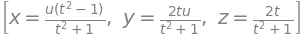

In [3]:
Surf_sys_rational_parametrization = []
for elem in Surf_sys:
    elem_rep = elem.replace(cos(v), (t**2 - 1) / (1 + t**2))
    elem_rep = elem_rep.replace(sin(v), 2*t/(1 + t**2))
    Surf_sys_rational_parametrization.append(elem_rep)

Surf_sys_rational_parametrization

In [4]:
Surf_param = [simplify((eq.lhs-eq.rhs) * (t**2 + 1)) for eq in Surf_sys_rational_parametrization]
Surf_param

In [5]:
# Составляем идеал
varlst = [t,u,x,y,z]
GB_Surf = sym.groebner(Surf_param,*varlst)
# Последний элемент базиса и есть неявное представление поверхности
Surf = GB_Surf[-1]
Surf

In [6]:
# Составляем систему из уравнения поверхности и её частных производных
Sys_Surf = [Surf] + [Surf.diff(v) for v in varlst[2:]]
Sys_Surf

In [7]:
# Проверяем размерность решений
sym.is_zero_dimensional(Sys_Surf)
# Идеал не нульмерный

False

In [8]:
GB_Sys_Surf = sym.groebner(Sys_Surf,z,y,x)
GB_Sys_Surf

In [9]:
Sol_y=sym.solve(GB_Sys_Surf[0],y)
Sol_z=sym.solve(GB_Sys_Surf[0],z)
Sol_x=sym.solve(GB_Sys_Surf[1].subs(z,Sol_z[0]),x)
Solution = {x:Sol_x[0], y:Sol_y[0], z:Sol_z[0]}
Solution1 = {x:Sol_x[0], y:Sol_y[0], z:Sol_z[1]}

print("Первая особая точка = ", Solution)
print("Вторая особая точка = ", Solution1)
# Проверяем подстановкой
print("Проверка", [eq.subs(Solution) for eq in Sys_Surf])
print("Проверка", [eq.subs(Solution1) for eq in Sys_Surf])

Первая особая точка =  {x: 0, y: 0, z: -1}
Вторая особая точка =  {x: 0, y: 0, z: 1}
Проверка [0, 0, 0, 0]
Проверка [0, 0, 0, 0]


In [10]:
Sol_x=sym.solve(GB_Sys_Surf[1],x)
Sol_y=sym.solve(GB_Sys_Surf[0],y)
Solution = {x:Sol_x[0], y:Sol_y[0]}

print("Множество №1 особых точек = {", Solution, ", z: Любой", "}")
print("Проверка", [eq.subs(Solution) for eq in Sys_Surf])

Множество №1 особых точек = { {x: 0, y: 0} , z: Любой }
Проверка [0, 0, 0, 0]


In [11]:
Sol_z=sym.solve(GB_Sys_Surf[1],z)
Sol_y=sym.solve(GB_Sys_Surf[-1],y)
Solution = {y:Sol_y[0], z:Sol_z[0]}

print("Множество №2 особых точек = { x: Любой", ", ",  Solution, "}")
print("Проверка", [eq.subs(Solution) for eq in Sys_Surf])

Множество №2 особых точек = { x: Любой ,  {y: 0, z: 0} }
Проверка [0, 0, 0, 0]


In [12]:
# Построим поверхность 
import numpy as np

vSurf = [sym.lambdify([t,u],eq.rhs,"numpy") for eq in Surf_sys_rational_parametrization]

tmin,tmax = -1.,1.
umin,umax = -2,2
tdiap=np.linspace(tmin,tmax,100)
udiap=np.linspace(umin,umax,100)
tval,uval=np.meshgrid(tdiap,udiap)
X,Y,Z=vSurf[0](tval,uval),vSurf[1](tval,uval),vSurf[2](tval,uval)

Xcrit,Ycrit,Zcrit = (vSurf[j](tdiap,0) for j in range(3))
Xcrit1,Ycrit1,Zcrit1 = (vSurf[j](0,udiap) for j in range(3))

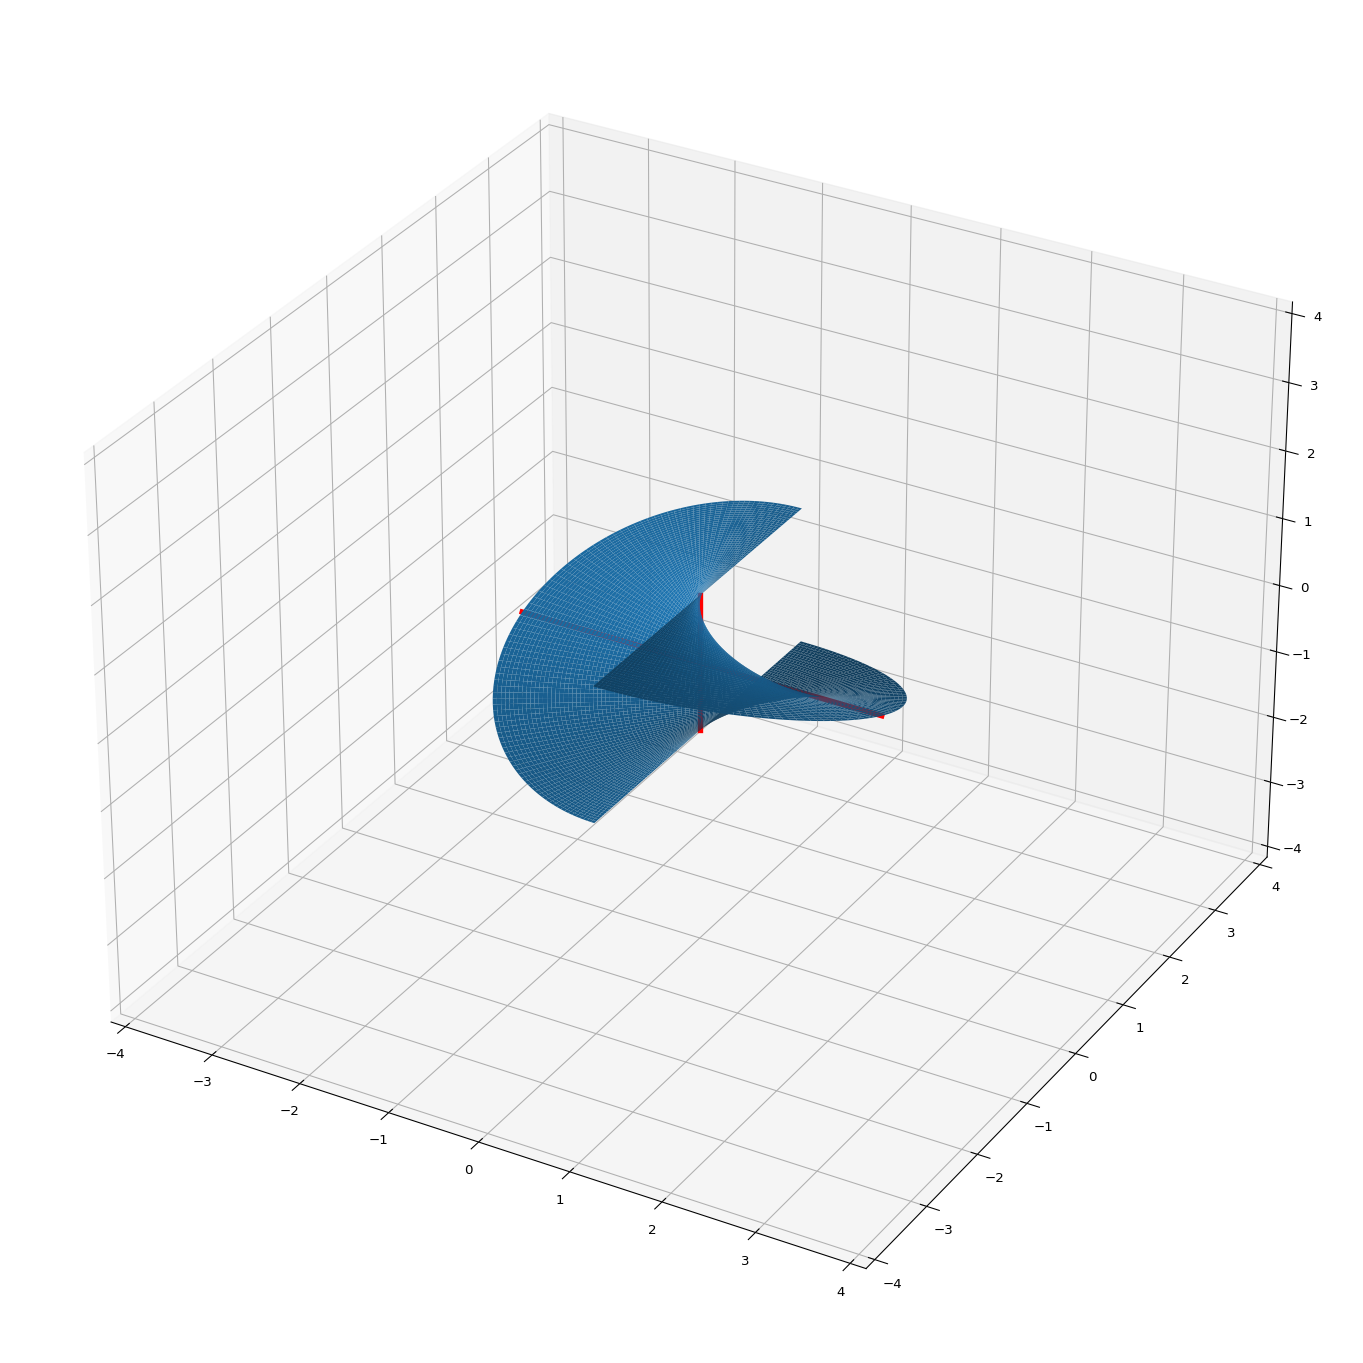

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(7,7),dpi=96)
ax=Axes3D(fig,rect=(-3,-3,2,2),proj_type="persp",clip_on=True,\
         auto_add_to_figure=False)
fig.add_axes(ax)
ax.set_xlim3d(-4,4)
ax.set_ylim3d(-4,4)
ax.set_zlim3d(-4,4)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1)
ax.plot(Xcrit,Ycrit,Zcrit,"r-",linewidth=4)
ax.plot(Xcrit1,Ycrit1,Zcrit1,"r-",linewidth=4)
plt.show()

Как мы видим параметры мы получили все особые точки